In [2]:
#import dependencies
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns


Using TensorFlow backend.


In [3]:
#read the raw timeseries data
data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
data

user_id activity        timestamp     acc_x      acc_y     acc_z
0             33  Jogging   49105962326000 -0.694638  12.680544  0.503953
1             33  Jogging   49106062271000  5.012288  11.264028  0.953424
2             33  Jogging   49106112167000  4.903325  10.882658 -0.081722
3             33  Jogging   49106222305000 -0.612916  18.496431  3.023717
4             33  Jogging   49106332290000 -1.184970  12.108489  7.205164
...          ...      ...              ...       ...        ...       ...
1098204       19  Sitting  131623331483000  9.000000  -1.570000  1.690000
1098205       19  Sitting  131623371431000  9.040000  -1.460000  1.730000
1098206       19  Sitting  131623411592000  9.080000  -1.380000  1.690000
1098207       19  Sitting  131623491487000  9.000000  -1.460000  1.730000
1098208       19  Sitting  131623531465000  8.880000  -1.330000  1.610000

[1098209 rows x 6 columns]

In [5]:
from sklearn import preprocessing
# Give a column name for the label 
LABEL = 'Encodedactivity'
# use laberen new coder to change string to integer
label_encoded = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = label_encoded.fit_transform(data['activity'].values.ravel())
# dummy=data_reformat.groupby(['class'])
# dummy.head(10)

data

dummy2=data.groupby(['activity'])
dummy2.head(10)

user_id    activity       timestamp      acc_x      acc_y     acc_z  \
0            33     Jogging  49105962326000  -0.694638  12.680544  0.503953   
1            33     Jogging  49106062271000   5.012288  11.264028  0.953424   
2            33     Jogging  49106112167000   4.903325  10.882658 -0.081722   
3            33     Jogging  49106222305000  -0.612916  18.496431  3.023717   
4            33     Jogging  49106332290000  -1.184970  12.108489  7.205164   
5            33     Jogging  49106442306000   1.375655  -2.492524 -6.510526   
6            33     Jogging  49106542312000  -0.612916  10.569390  5.706926   
7            33     Jogging  49106652389000  -0.503953  13.947236  7.055340   
8            33     Jogging  49106762313000  -8.430995  11.413852  5.134871   
9            33     Jogging  49106872299000   0.953424   1.375655  1.648062   
597          33     Walking  49394992294000   0.844462   8.008764  2.792171   
598          33     Walking  49395102310000   1.116869   8.621680  3.786457   
599          33     Walking  49395202316000  -0.503953  16.657684  1.307553   
600          33     Walking  49395302292000   4.794363  10.760075 -1.184970   
601          33     Walking  49395412338000  -0.040861   9.234595 -0.694638   
602          33     Walking  49395522293000   2.492524   8.730643 -1.457377   
603          33     Walking  49395632309000   0.531194   9.888372 -1.225831   
604          33     Walking  49395742294000   1.757025  11.032481 -0.653777   
605          33     Walking  49395852340000   2.982856  12.149350 -1.307553   
606          33     Walking  49395962295000  -0.803601  12.721405 -1.266692   
1161         33    Upstairs  49560572311000  10.119919   4.331271 -3.786457   
1162         33    Upstairs  49560682449000   4.862464   3.909040 -2.792171   
1163         33    Upstairs  49560782303000   9.466142  13.402422 -3.827318   
1164         33    Upstairs  49560842209000   5.747787   7.627395 -3.146300   
1165         33    Upstairs  49560942184000   2.301839   8.921328 -3.023717   
1166         33    Upstairs  49561002456000   7.818079   7.055340 -4.331271   
1167         33    Upstairs  49561062118000   2.833032   8.539958 -3.336985   
1168         33    Upstairs  49561162613000   1.797886  10.950760 -3.105439   
1169         33    Upstairs  49561262283000   0.994285   8.771504 -3.568531   
1170         33    Upstairs  49561332321000   1.225831   9.466142 -3.527670   
1769         33  Downstairs  49646322311000  -0.040861   4.985047  6.510526   
1770         33  Downstairs  49646422317000  -0.463092   4.372132  7.436710   
1771         33  Downstairs  49646522323000  -0.299648   4.603678  6.510526   
1772         33  Downstairs  49646572281000  -0.272407   4.481094  6.360703   
1773         33  Downstairs  49646672317000  -1.525479   5.175732  7.164303   
1774         33  Downstairs  49646782303000   1.266692   6.782933  8.853226   
1775         33  Downstairs  49646882461000  -1.116869   1.457377  7.082581   
1776         33  Downstairs  49646982315000  -0.381370   0.762740  7.545672   
1777         33  Downstairs  49647082260000  -0.653777   2.369940  7.273266   
1778         33  Downstairs  49647192306000   0.272407   1.648062  8.117727   
221335       27     Sitting  12363992261000   2.600000   9.660000  1.035146   
221336       27     Sitting  12364042279000   2.680000   9.530000  0.503953   
221337       27     Sitting  12364092267000   3.490000   8.890000  0.762740   
221338       27     Sitting  12364142316000   3.640000   9.380000  0.926184   
221339       27     Sitting  12364192273000   2.910000   9.340000  1.035146   
221340       27     Sitting  12364242292000   3.150000   9.430000  0.885323   
221341       27     Sitting  12364292249000   3.150000   9.530000  0.844462   
221342       27     Sitting  12364342267000   2.910000   9.720000  0.844462   
221343       27     Sitting  12364392285000   3.210000   9.380000  0.926184   
221344       27     Sitting  12364442273000   3.150000   9

In [6]:
data_train = data[data['user_id'] <=28]
data_test =  data[data['user_id'] > 28]
#data_train = data[data['user_id'] >=8]
#data_test =  data[data['user_id'] < 8]
x_train = data_train[['acc_x','acc_y','acc_z']]
x_test = data_test[['acc_x','acc_y','acc_z']]
y_train = data_train[['Encodedactivity']]
y_test = data_test[['Encodedactivity']]
y_train

Encodedactivity
8489                   5
8490                   5
8491                   5
8492                   5
8493                   5
...                  ...
1098204                2
1098205                2
1098206                2
1098207                2
1098208                2

[834785 rows x 1 columns]

In [7]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_training_scaled = scaler.fit_transform(x_train)
x_training_scaled

array([[0.51016316, 0.74190794, 0.48893191],
       [0.49570273, 0.75152636, 0.48789509],
       [0.4898497 , 0.74293849, 0.48478463],
       ...,
       [0.7252275 , 0.45977301, 0.54529307],
       [0.72320526, 0.45775536, 0.54630804],
       [0.72017189, 0.46103405, 0.54326313]])

In [9]:
#create list for feature set and labels by running loop over every 200 records and a sliding window of 50 
features_set = []
labels_preencoded = []
x_training_scaled[0:200]
x_training_scaled[0:200,0]
x_training_scaled[2,1]

for i in range(0, 834600, 50):
    features_set.append([x_training_scaled[i:i+200, 0],x_training_scaled[i:i+200, 1],x_training_scaled[i:i+200, 2]])
    max_labels_perwindow = stats.mode(y_train["Encodedactivity"][i: i+200])[0][0]
    labels_preencoded.append(max_labels_perwindow)


len(features_set)
labels = to_categorical(labels_preencoded)
labels_preencoded


[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,


In [11]:
#Reshape the feature

# # features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
#features_set.shape[0]
#features_set.shape[1]
#features_set = np.reshape(features_set, (4173,600,1))
#features_set = np.reshape(features_set, (4173,200,3))
features_set = np.reshape(features_set, (16692,200,3))
#features_set = np.reshape(features_set, (features_set.shape[0], 240))
features_set.shape

(16692, 200, 3)

In [12]:
features_set

array([[[0.51016316, 0.49570273, 0.4898497 ],
        [0.49948999, 0.49948999, 0.51119605],
        [0.4984571 , 0.49294836, 0.49363695],
        ...,
        [0.52176451, 0.43916459, 0.49480721],
        [0.47718129, 0.41013365, 0.51312435],
        [0.48962312, 0.59088579, 0.64134433]],

       [[0.55561022, 0.56731629, 0.56249615],
        [0.57041495, 0.49466984, 0.53150951],
        [0.54700283, 0.49363695, 0.50913027],
        ...,
        [0.50932268, 0.51416117, 0.48098296],
        [0.47026916, 0.50344737, 0.48685827],
        [0.56738455, 0.63063053, 0.38006589]],

       [[0.53839543, 0.5742022 , 0.54596994],
        [0.63307682, 0.65442316, 0.55561022],
        [0.49948999, 0.58108812, 0.5149833 ],
        ...,
        [0.50448419, 0.49169676, 0.48685827],
        [0.45298884, 0.46439385, 0.4830566 ],
        [0.53144149, 0.66000706, 0.45368006]],

       ...,

       [[0.72219414, 0.72219414, 0.72219414],
        [0.72118301, 0.72219414, 0.72219414],
        [0.72219414, 0

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
# Initiliazing the sequential model for the data created by sliding window method
model = Sequential()
# Configuring the parameters
model.add(Dense(units=60, activation='relu', input_shape=(200,3)))
model.add(Dropout(0.1))
#model.add(Dense(units=60, activation='relu'))
#model.add(Dropout(0.1))
# model.add(LSTM(36,return_sequences=True,input_shape=(200, 3)))
model.add(LSTM(36,return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.1))
model.add(LSTM(units=18))
# Adding a dropout layer
model.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200, 60)           240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 60)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 36)           13968     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 36)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 18)                3960      
_________________________________________________________________
dropout_3 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                

In [68]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])
labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [69]:
# model.fit(features_set, labels, epochs = 30, batch_size = 16, verbose = 2)
# Fit the model to the training data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_preencoded),
                                                 labels_preencoded)
model.fit(features_set,labels,epochs=70, batch_size = 16, class_weight=class_weights, verbose=2)

from sklearn.externals import joblib
filename = 'lstm_sliding_model.sav'
#joblib.dump(model, filename)


Epoch 1/70
 - 200s - loss: 1.2859 - accuracy: 0.5093
Epoch 2/70
 - 224s - loss: 0.9318 - accuracy: 0.7002
Epoch 3/70
 - 194s - loss: 0.7982 - accuracy: 0.7360
Epoch 4/70
 - 207s - loss: 0.6898 - accuracy: 0.7667
Epoch 5/70
 - 187s - loss: 0.6183 - accuracy: 0.7855
Epoch 6/70
 - 182s - loss: 0.5974 - accuracy: 0.7879
Epoch 7/70
 - 176s - loss: 0.5558 - accuracy: 0.8009
Epoch 8/70
 - 173s - loss: 0.5387 - accuracy: 0.8078
Epoch 9/70
 - 174s - loss: 0.5199 - accuracy: 0.8155
Epoch 10/70
 - 173s - loss: 0.4913 - accuracy: 0.8176
Epoch 11/70
 - 174s - loss: 0.4724 - accuracy: 0.8227
Epoch 12/70
 - 175s - loss: 0.4551 - accuracy: 0.8302
Epoch 13/70
 - 171s - loss: 0.4385 - accuracy: 0.8358
Epoch 14/70
 - 172s - loss: 0.4138 - accuracy: 0.8429
Epoch 15/70
 - 172s - loss: 0.4164 - accuracy: 0.8421
Epoch 16/70
 - 173s - loss: 0.3945 - accuracy: 0.8496
Epoch 17/70
 - 174s - loss: 0.3883 - accuracy: 0.8544
Epoch 18/70
 - 172s - loss: 0.3708 - accuracy: 0.8589
Epoch 19/70
 - 173s - loss: 0.3656 - 

['lstm_sliding_model.sav']

In [17]:
#Now check the test data
x_test

acc_x      acc_y     acc_z
0      -0.694638  12.680544  0.503953
1       5.012288  11.264028  0.953424
2       4.903325  10.882658 -0.081722
3      -0.612916  18.496431  3.023717
4      -1.184970  12.108489  7.205164
...          ...        ...       ...
832897  8.200000   4.520000  0.150000
832898  8.960000   4.020000  1.460000
832899  7.970000   4.750000  0.610000
832900  8.010000   4.790000  0.690000
832901  8.350000   4.440000  1.080000

[263424 rows x 3 columns]

In [18]:
y_test

Encodedactivity
0                     1
1                     1
2                     1
3                     1
4                     1
...                 ...
832897                3
832898                3
832899                3
832900                3
832901                3

[263424 rows x 1 columns]

In [20]:
#scale the test data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_testing_scaled = scaler.fit_transform(x_test)
x_testing_scaled
len(x_testing_scaled)

263424

In [21]:
#Create arrays by  taking a window of 200 records 
features_set_2 = []
labels_2 = []
#x_testing_scaled[0:200]
#x_testing_scaled[0:200,0]
#x_testing_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 263400, 200):
#for i in range(0, 263400, 50):
    features_set_2.append([x_testing_scaled[i:i+200, 0],x_testing_scaled[i:i+200, 1],x_testing_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_test["Encodedactivity"][i: i+200])[0][0]
    labels_2.append(max_labels_perwindow)

len(features_set_2)
labels_2 = to_categorical(labels_2)
len(labels_2)
features_set_2

[[array([0.47814364, 0.62240364, 0.61964927, 0.48020941, 0.46574898,
         0.53047662, 0.48020941, 0.48296378, 0.28258354, 0.51980345,
         0.28843655, 0.53150951, 0.44818989, 0.34076955, 0.6430614 ,
         0.65442316, 0.4561087 , 0.58487538, 0.44440263, 0.56559481,
         0.58590827, 0.48296378, 0.43751671, 0.40549719, 0.47538927,
         0.50844168, 0.63996274, 0.27673051, 0.46196173, 0.37967499,
         0.59348278, 0.45025566, 0.68954135, 0.43579524, 0.56456192,
         0.4048086 , 0.59554856, 0.50740879, 0.591417  , 0.58005523,
         0.63892985, 0.50155576, 0.37382196, 0.54218268, 0.41238311,
         0.78904287, 0.41548177, 0.51119605, 0.29635537, 0.57523509,
         0.41926903, 0.49363695, 0.46953624, 0.43372946, 0.46092884,
         0.43269657, 0.5325424 , 0.45989595, 0.46368321, 0.40274283,
         0.54218268, 0.46368321, 0.55664311, 0.48020941, 0.49673562,
         0.30220841, 0.46368321, 0.36900182, 0.54493705, 0.36796893,
         0.73292262, 0.35832864, 0

In [74]:
#reshape the data
features_set_2, labels_2 = np.array(features_set_2), np.array(labels_2)
#test_features_2 = np.array(features_set_2)
# test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
# Making Predictions

features_set_2.shape

(1317, 3, 200)

In [22]:
features_set_2= np.reshape(features_set_2,(1317,200,3))
#features_set_2= np.reshape(features_set_2,(5268,200,3))
features_set_2.shape

(1317, 200, 3)

In [23]:
model_loss, model_accuracy = model.evaluate(
    features_set_2, labels_2, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
#gave 83% accuracy first and then reduced

NameError: name 'model' is not defined

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

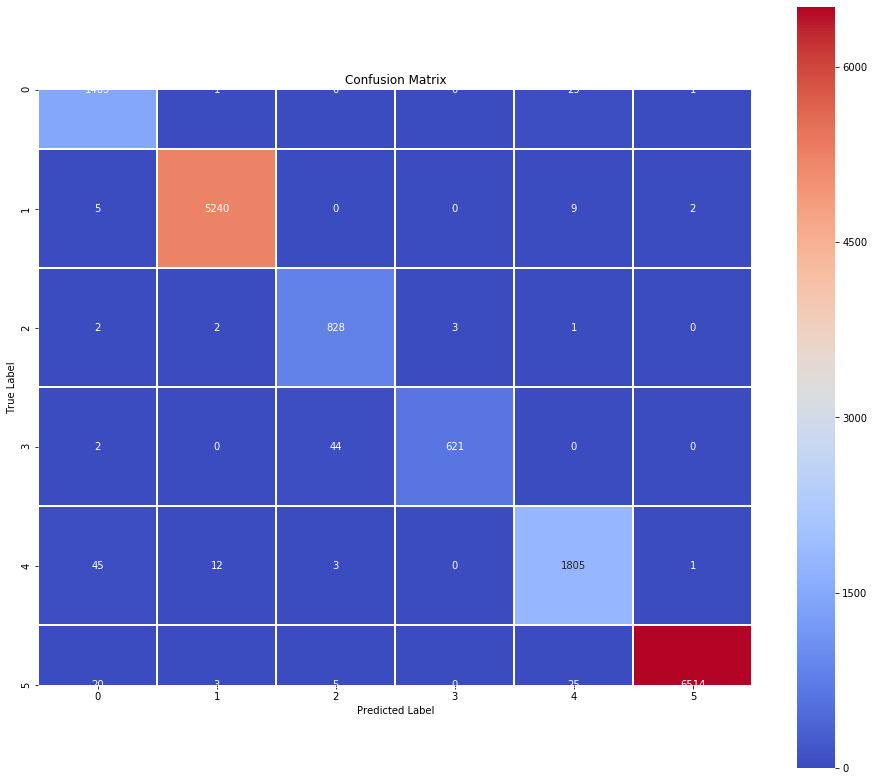

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1500
           1       1.00      1.00      1.00      5256
           2       0.94      0.99      0.97       836
           3       1.00      0.93      0.96       667
           4       0.97      0.97      0.97      1866
           5       1.00      0.99      1.00      6567

    accuracy                           0.99     16692
   macro avg       0.97      0.98      0.98     16692
weighted avg       0.99      0.99      0.99     16692



array([[1.23381615e-05, 3.54647636e-06, 1.78813934e-07, 0.00000000e+00,
        3.56733799e-05, 1.20021760e-01],
       [1.91628933e-05, 1.63912773e-06, 2.98023224e-08, 0.00000000e+00,
        1.43945217e-05, 1.72757953e-01],
       [9.65595245e-06, 1.25169754e-06, 1.19209290e-07, 0.00000000e+00,
        1.09672546e-05, 1.79003179e-01],
       ...,
       [2.30073929e-05, 3.24845314e-06, 4.57930028e-01, 1.55568123e-05,
        9.68575478e-06, 7.03334808e-06],
       [2.27689743e-05, 3.42726707e-06, 4.58839923e-01, 1.52885914e-05,
        9.50694084e-06, 6.94394112e-06],
       [2.37226486e-05, 3.33786011e-06, 4.62213755e-01, 1.51395798e-05,
        9.74535942e-06, 7.21216202e-06]], dtype=float32)

In [81]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(16, 14))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels= [0,1,2,3,4,5],
                yticklabels= [0,1,2,3,4,5],
                annot=True,
                square=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels_pred_test = model.predict(features_set)
labels_pred_test
# # Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test

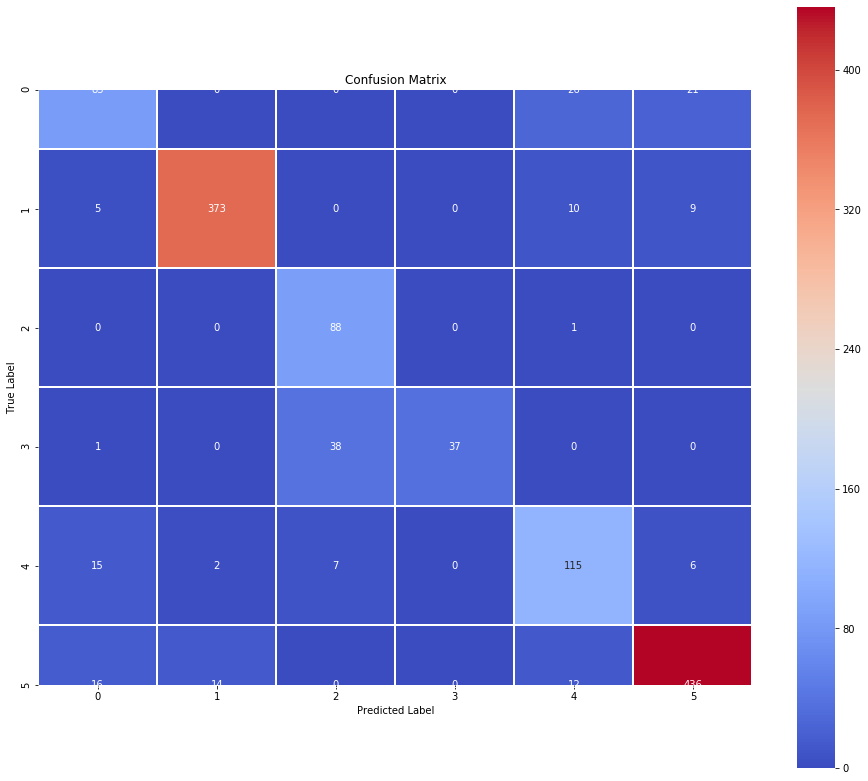

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       132
           1       0.96      0.94      0.95       397
           2       0.66      0.99      0.79        89
           3       1.00      0.49      0.65        76
           4       0.70      0.79      0.74       145
           5       0.92      0.91      0.92       478

    accuracy                           0.86      1317
   macro avg       0.82      0.79      0.79      1317
weighted avg       0.87      0.86      0.86      1317



array([[3.84449959e-06, 2.56409824e-01, 0.00000000e+00, 0.00000000e+00,
        2.35438347e-06, 5.06639481e-07],
       [5.99026680e-06, 1.18732154e-01, 0.00000000e+00, 0.00000000e+00,
        9.62615013e-06, 4.47034836e-07],
       [5.66244125e-07, 2.82490253e-03, 0.00000000e+00, 0.00000000e+00,
        8.79466534e-05, 1.49011612e-07],
       ...,
       [3.35276127e-05, 3.42726707e-06, 1.44786835e-01, 1.10536814e-04,
        1.58846378e-05, 7.89761543e-06],
       [5.15580177e-06, 2.65240669e-06, 5.06310701e-01, 2.25752592e-04,
        1.35004520e-05, 9.95397568e-06],
       [2.39715591e-05, 2.93330459e-06, 9.37256217e-02, 1.68486717e-04,
        1.30419821e-05, 6.94351775e-06]], dtype=float32)

In [82]:
labels_pred_test = model.predict(features_set_2)
labels_pred_test
# # Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels_2, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test

In [299]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#59.78%
#model.add(Dense(units=6, activation='relu', input_dim=30))
#model.add(Dense(units=6, activation='softmax'))
#82.66%, with noise - (0.05- 83.76%, 83.1%, 0.2 - 84.2%, 81.9%),with dropout (0.5)-85 to 87%, with dropout (0.1,0.1) - 85.2%, (0.2,0.1) - 86-87%

# Initiliazing the sequential model
# Configuring the parameters
model.add(Dense(units=60, activation='relu', input_shape=(200,3)))
model.add(Dropout(0.1))
# model.add(Dense(units=60, activation='relu'))
# model.add(Dropout(0.1))
# model.add(LSTM(36,return_sequences=True,input_shape=(200, 3)))
model.add(LSTM(36,return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.1))
model.add(LSTM(units=18))
# Adding a dropout layer
model.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 200, 60)           240       
_________________________________________________________________
dropout_59 (Dropout)         (None, 200, 60)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 200, 36)           13968     
_________________________________________________________________
dropout_60 (Dropout)         (None, 200, 36)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 18)                3960      
_________________________________________________________________
dropout_61 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 6)               

In [300]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 200, 60)           240       
_________________________________________________________________
dropout_59 (Dropout)         (None, 200, 60)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 200, 36)           13968     
_________________________________________________________________
dropout_60 (Dropout)         (None, 200, 36)           0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 18)                3960      
_________________________________________________________________
dropout_61 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 6)               

In [302]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [303]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_preencoded),
                                                 labels_preencoded)
model.fit(features_set,labels,epochs=100, batch_size = 16, class_weight=class_weights, verbose=2)


Epoch 1/100
 - 58s - loss: 1.5113 - accuracy: 0.3856
Epoch 2/100
 - 51s - loss: 1.4637 - accuracy: 0.3942
Epoch 3/100
 - 48s - loss: 1.3411 - accuracy: 0.4879
Epoch 4/100
 - 47s - loss: 1.4848 - accuracy: 0.3825
Epoch 5/100
 - 48s - loss: 1.3787 - accuracy: 0.4155
Epoch 6/100
 - 55s - loss: 1.2079 - accuracy: 0.5294
Epoch 7/100
 - 55s - loss: 1.0219 - accuracy: 0.6544
Epoch 8/100
 - 56s - loss: 0.8160 - accuracy: 0.7309
Epoch 9/100
 - 56s - loss: 0.7826 - accuracy: 0.7371
Epoch 10/100
 - 53s - loss: 0.7644 - accuracy: 0.7374
Epoch 11/100
 - 54s - loss: 0.7582 - accuracy: 0.7386
Epoch 12/100
 - 53s - loss: 0.7320 - accuracy: 0.7457
Epoch 13/100
 - 53s - loss: 0.7062 - accuracy: 0.7618
Epoch 14/100
 - 55s - loss: 0.6838 - accuracy: 0.7628
Epoch 15/100
 - 57s - loss: 0.6486 - accuracy: 0.7733
Epoch 16/100
 - 54s - loss: 0.6720 - accuracy: 0.7652
Epoch 17/100
 - 55s - loss: 0.6280 - accuracy: 0.7791
Epoch 18/100
 - 57s - loss: 0.6251 - accuracy: 0.7803
Epoch 19/100
 - 60s - loss: 0.6135 - 

In [304]:
x_test

acc_x      acc_y     acc_z
0      -0.694638  12.680544  0.503953
1       5.012288  11.264028  0.953424
2       4.903325  10.882658 -0.081722
3      -0.612916  18.496431  3.023717
4      -1.184970  12.108489  7.205164
...          ...        ...       ...
832897  8.200000   4.520000  0.150000
832898  8.960000   4.020000  1.460000
832899  7.970000   4.750000  0.610000
832900  8.010000   4.790000  0.690000
832901  8.350000   4.440000  1.080000

[263424 rows x 3 columns]

In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_testing_scaled = scaler.fit_transform(x_test)
x_testing_scaled
len(x_testing_scaled)

263424

In [16]:
features_set_2 = []
labels_2 = []
#x_testing_scaled[0:200]
#x_testing_scaled[0:200,0]
#x_testing_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 263400, 200):
    features_set_2.append([x_testing_scaled[i:i+200, 0],x_testing_scaled[i:i+200, 1],x_testing_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_test["ActivityEncoded"][i: i+200])[0][0]
    labels_2.append(max_labels_perwindow)

len(features_set_2)
labels_2 = to_categorical(labels_2)
len(labels_2)
len(features_set_2)

NameError: name 'x_testing_scaled' is not defined

In [307]:
features_set_2, labels_2 = np.array(features_set_2), np.array(labels_2)
#test_features_2 = np.array(features_set_2)
# test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
# Making Predictions

features_set_2.shape

(1317, 3, 200)

In [308]:
features_set_2= np.reshape(features_set_2,(1317,200,3))
features_set_2.shape

(1317, 200, 3)

In [309]:
model_loss, model_accuracy = model.evaluate(
    features_set_2, labels_2, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
#gave 83% accuracy first and then reduced

#gives 87.77 percent accuracy here 

Normal Neural Network - Loss: 0.40312837321104744, Accuracy: 0.8777524828910828


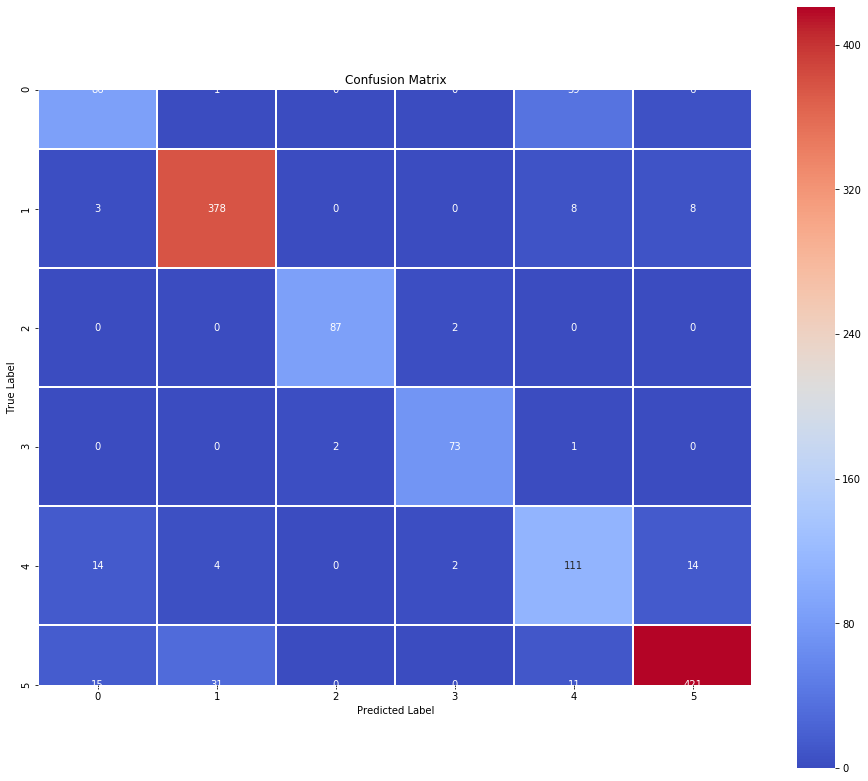

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       132
           1       0.91      0.95      0.93       397
           2       0.98      0.98      0.98        89
           3       0.95      0.96      0.95        76
           4       0.65      0.77      0.70       145
           5       0.94      0.88      0.91       478

    accuracy                           0.88      1317
   macro avg       0.86      0.86      0.86      1317
weighted avg       0.88      0.88      0.88      1317



array([[2.13950872e-04, 7.86780715e-01, 4.05907631e-05, 1.31130219e-06,
        7.29590654e-04, 1.17480755e-04],
       [1.31994486e-04, 7.01234281e-01, 3.05771828e-05, 1.01327896e-06,
        4.90278006e-04, 1.25229359e-04],
       [3.76191735e-03, 7.12574720e-01, 2.10666656e-03, 2.84910202e-05,
        8.50433111e-03, 2.57521868e-04],
       ...,
       [6.18734956e-03, 4.73618507e-04, 2.02296108e-01, 9.45648789e-01,
        1.45507753e-02, 5.34474850e-03],
       [5.66810369e-03, 6.05434179e-04, 4.24452186e-01, 9.00626421e-01,
        1.27908885e-02, 7.66816735e-03],
       [5.82834473e-03, 4.79956478e-04, 1.98405355e-01, 9.48072910e-01,
        1.52746998e-02, 5.82199637e-03]], dtype=float32)

In [310]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(16, 14))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels= [0,1,2,3,4,5],
                yticklabels= [0,1,2,3,4,5],
                annot=True,
                square=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels_pred_test = model.predict(features_set_2)
labels_pred_test
# # Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels_2, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test

In [84]:
from sklearn.externals import joblib

filename = 'finalized_model_lstm.sav'
#joblib.dump(model, filename)


In [85]:
# load the model from disk
loaded_model = joblib.load(filename)
loaded_model.evaluate(
    features_set_2, labels_2, verbose=2)
#features_set_single = features_set_2[0]
#features_set_single = np.reshape(features_set_single,(1,200,3))
#loaded_model.predict(features_set_single)
# print(result)
#labels_2[0]

[0.40312837321104744, 0.8777524828910828]

In [47]:
#model = loaded_model
model_json = loaded_model.to_json()
#model_json
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
loaded_model.save_weights('model.h5')
#print(“Saved model to disk”)

# later…

# # load json and create model
#     json_file = open(‘model.json’, ‘r’)
#     loaded_model_json = json_file.read()
#     json_file.close()
#     loaded_model = model_from_json(loaded_model_json)

# # load weights into new model
#     loaded_model.load_weights(“model.h5”)
#     print(“Loaded model from disk”)

In [54]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json)

# load weights into new model
loaded_model2.load_weights('model.h5')
print('Loaded model from disk')

loaded_model2.predict(features_set_single)

Loaded model from disk


array([[2.1389447e-04, 7.8678071e-01, 4.0564202e-05, 1.3210357e-06,
        7.2959921e-04, 1.1742605e-04]], dtype=float32)

In [55]:
loaded_model2.save("model_full.h5")

In [360]:
features_set= np.reshape(features_set,(4173,600))
model = Sequential()
# With dropout (0.1,0.1), 260 epochs, 67%; 
# Initiliazing the sequential model
# Configuring the parameters
#model.add(Dense(units=60, activation='relu', input_shape=(200,3)))
model.add(Dense(units=60, activation='relu', input_dim=600))
model.add(Dropout(0.1))
#model.add(Dense(units=36, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'))
# Adding a dropout layer
model.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model.add(Dense(units=6, activation='softmax'))
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 60)                36060     
_________________________________________________________________
dropout_87 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_88 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 6)                 606       
Total params: 42,766
Trainable params: 42,766
Non-trainable params: 0
_________________________________________________________________


In [361]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [362]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_preencoded),
                                                 labels_preencoded)
model.fit(features_set,labels,epochs=260, class_weight=class_weights, verbose=2)

Epoch 1/260
 - 1s - loss: 1.4607 - accuracy: 0.4203
Epoch 2/260
 - 0s - loss: 1.3332 - accuracy: 0.4898
Epoch 3/260
 - 0s - loss: 1.3044 - accuracy: 0.5044
Epoch 4/260
 - 0s - loss: 1.2839 - accuracy: 0.5181
Epoch 5/260
 - 0s - loss: 1.2669 - accuracy: 0.5250
Epoch 6/260
 - 0s - loss: 1.2611 - accuracy: 0.5310
Epoch 7/260
 - 0s - loss: 1.2343 - accuracy: 0.5461
Epoch 8/260
 - 0s - loss: 1.1878 - accuracy: 0.5720
Epoch 9/260
 - 0s - loss: 1.1423 - accuracy: 0.6008
Epoch 10/260
 - 0s - loss: 1.1278 - accuracy: 0.6065
Epoch 11/260
 - 0s - loss: 1.0826 - accuracy: 0.6278
Epoch 12/260
 - 1s - loss: 1.0425 - accuracy: 0.6453
Epoch 13/260
 - 0s - loss: 1.0265 - accuracy: 0.6487
Epoch 14/260
 - 0s - loss: 1.0431 - accuracy: 0.6432
Epoch 15/260
 - 0s - loss: 1.0291 - accuracy: 0.6432
Epoch 16/260
 - 0s - loss: 0.9838 - accuracy: 0.6657
Epoch 17/260
 - 0s - loss: 0.9589 - accuracy: 0.6700
Epoch 18/260
 - 0s - loss: 0.9685 - accuracy: 0.6628
Epoch 19/260
 - 0s - loss: 0.9611 - accuracy: 0.6647
Ep

Epoch 155/260
 - 0s - loss: 0.6159 - accuracy: 0.7678
Epoch 156/260
 - 0s - loss: 0.6375 - accuracy: 0.7549
Epoch 157/260
 - 0s - loss: 0.5634 - accuracy: 0.7884
Epoch 158/260
 - 0s - loss: 0.5807 - accuracy: 0.7803
Epoch 159/260
 - 0s - loss: 0.5956 - accuracy: 0.7697
Epoch 160/260
 - 0s - loss: 0.5862 - accuracy: 0.7731
Epoch 161/260
 - 0s - loss: 0.5829 - accuracy: 0.7783
Epoch 162/260
 - 0s - loss: 0.5960 - accuracy: 0.7649
Epoch 163/260
 - 0s - loss: 0.5812 - accuracy: 0.7788
Epoch 164/260
 - 0s - loss: 0.6441 - accuracy: 0.7501
Epoch 165/260
 - 0s - loss: 0.6286 - accuracy: 0.7527
Epoch 166/260
 - 0s - loss: 0.6163 - accuracy: 0.7563
Epoch 167/260
 - 0s - loss: 0.5973 - accuracy: 0.7671
Epoch 168/260
 - 0s - loss: 0.5801 - accuracy: 0.7750
Epoch 169/260
 - 0s - loss: 0.5454 - accuracy: 0.7889
Epoch 170/260
 - 0s - loss: 0.6185 - accuracy: 0.7608
Epoch 171/260
 - 0s - loss: 0.6096 - accuracy: 0.7661
Epoch 172/260
 - 0s - loss: 0.5724 - accuracy: 0.7774
Epoch 173/260
 - 0s - loss: 

In [363]:
features_set_2= np.reshape(features_set_2,(1317,600))
model_loss, model_accuracy = model.evaluate(
    features_set_2, labels_2, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.0468603558131213, Accuracy: 0.6302201747894287
